# Project 1

Loading the data:

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  

In [3]:
# Changing column names
X.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
y.columns = ['Heating Load', 'Cooling Load']
print(X)

     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing A

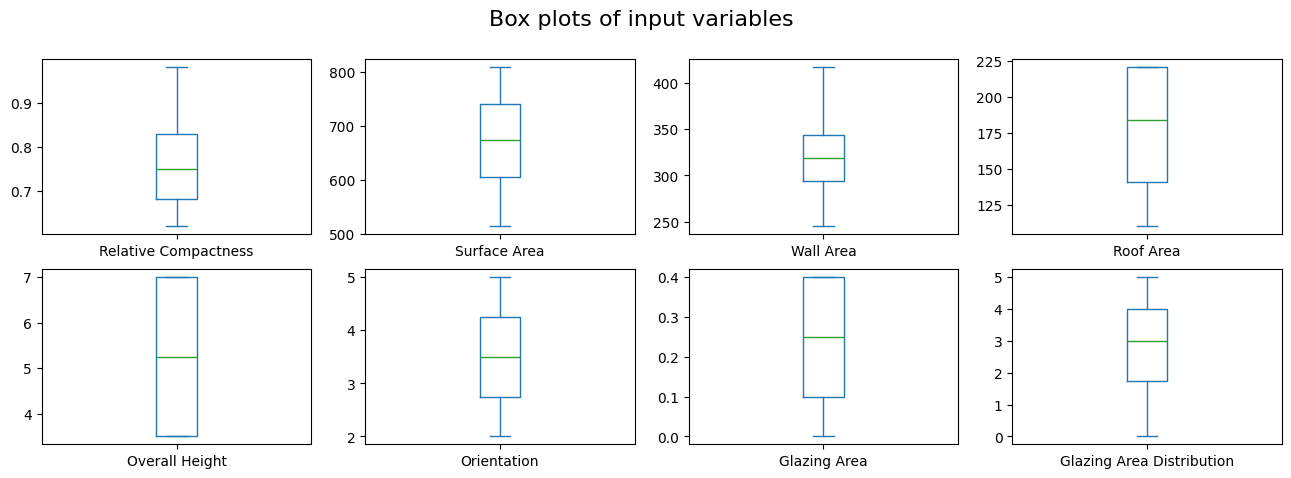

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [ ]:
import matplotlib.pyplot as plt
X.plot(kind='box', subplots=True, layout=(2, 4), figsize=(16,5), sharex=False, sharey=False)
plt.suptitle("Boxplots of input variables", fontsize=16)
plt.show()
X.describe()

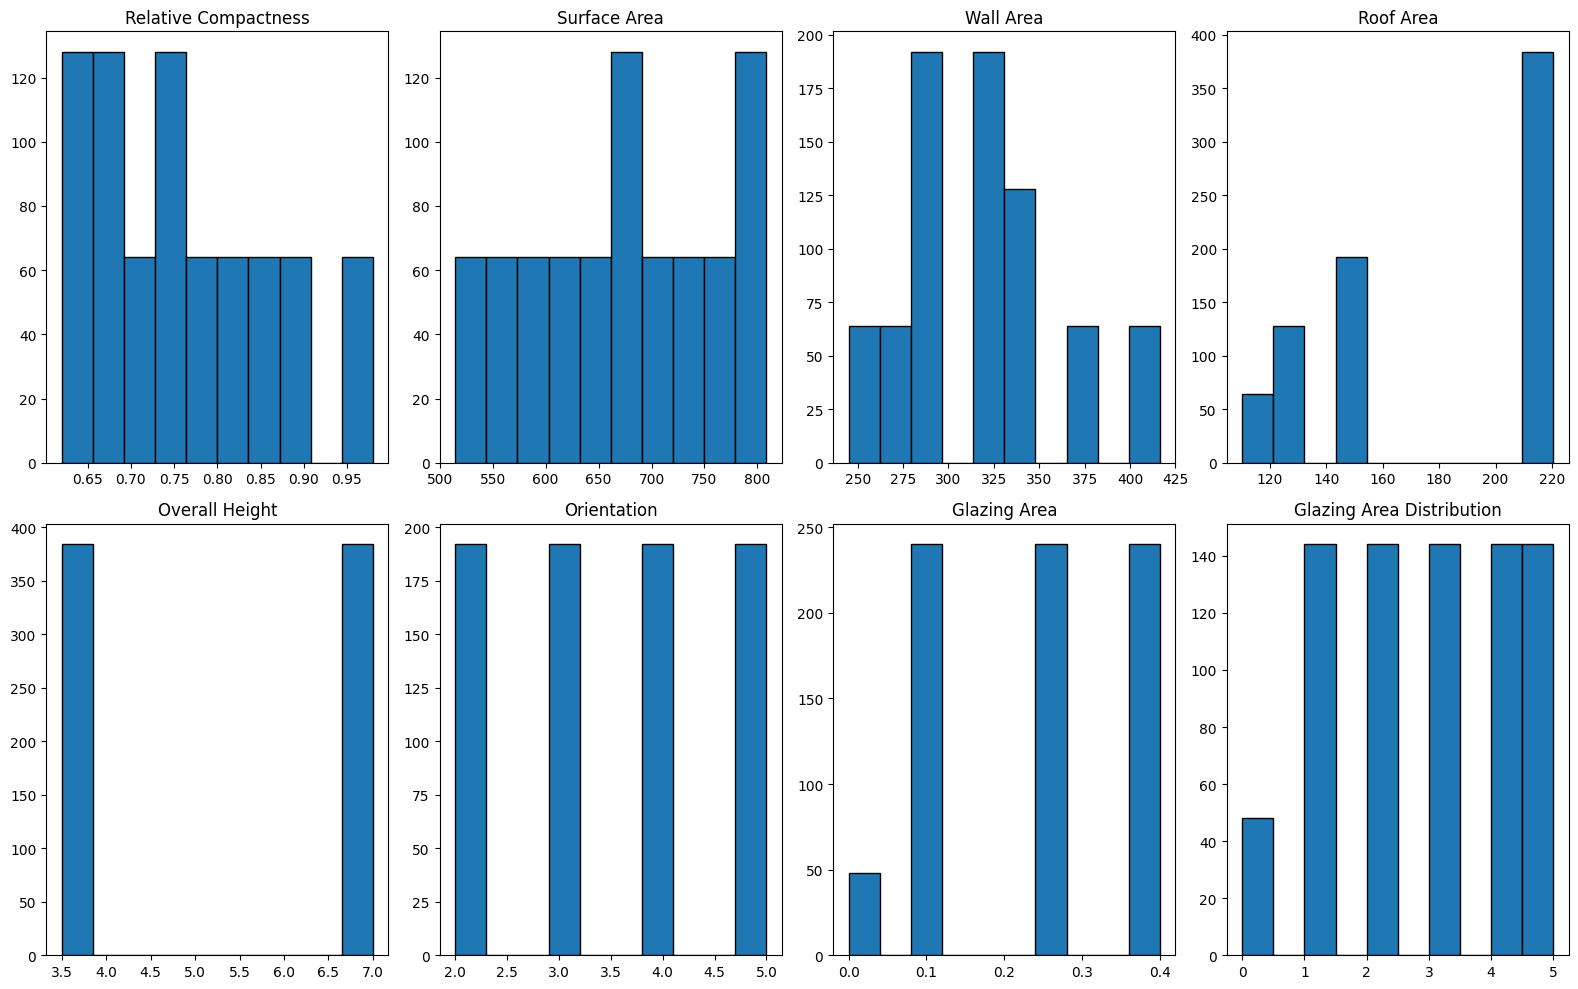

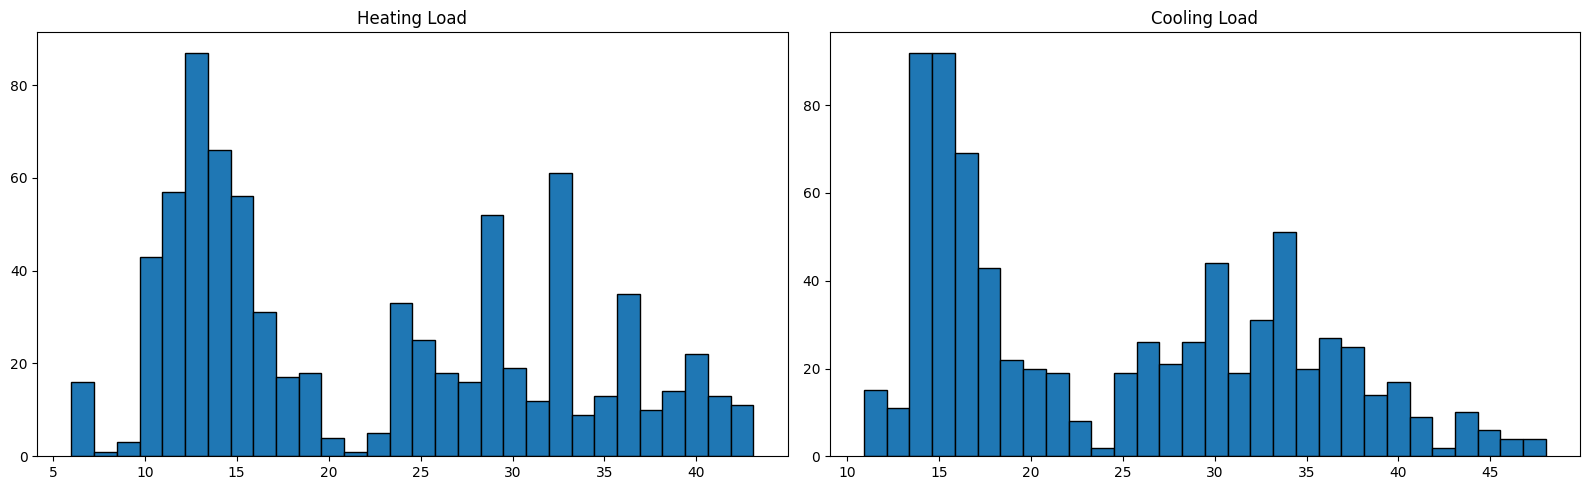

In [5]:
X.hist(figsize=(16, 10), bins=10, edgecolor='black', layout=(2, 4), grid=False)
plt.tight_layout()
plt.show()

y.hist(figsize=(16, 5), bins=30, edgecolor='black', layout=(1, 2), grid=False)
plt.tight_layout()
plt.show()

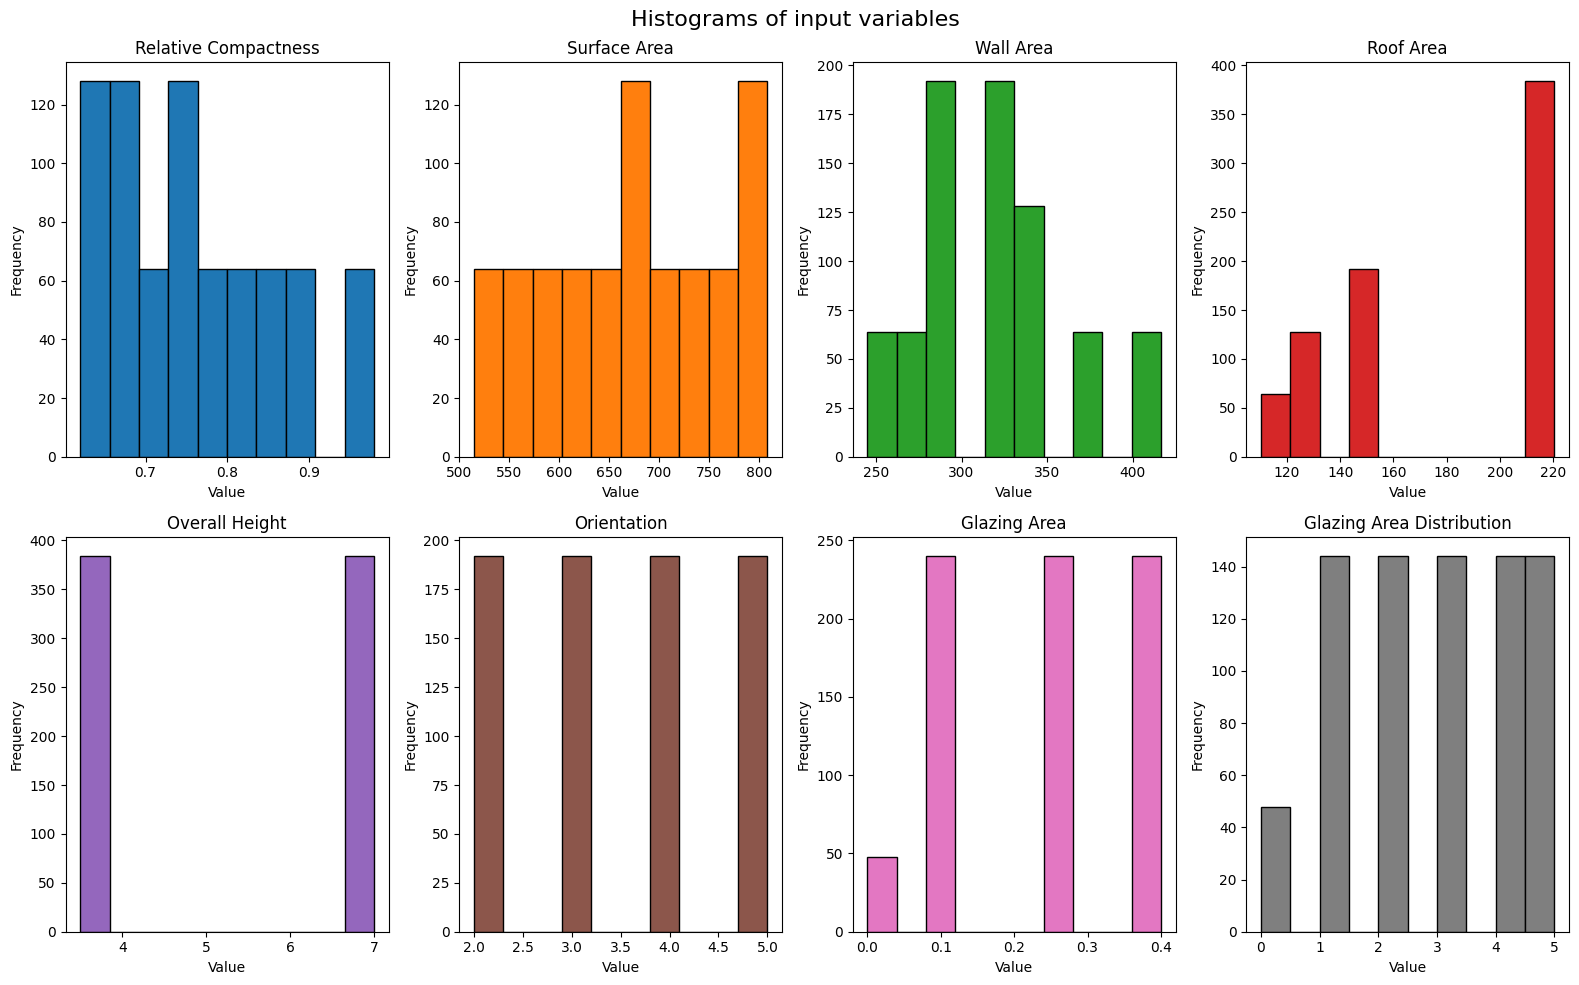

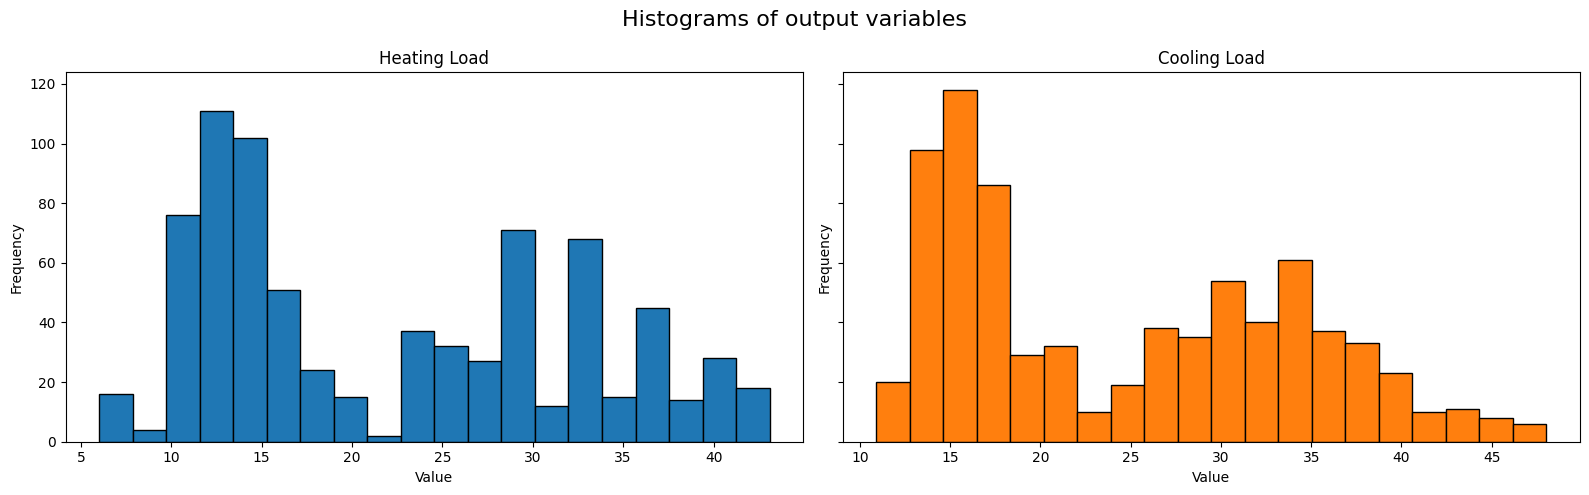

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle("Histograms of input variables", fontsize=16)

for i in range(2):
    for j in range(4): 
        attr = i*4 + j
        axs[i, j].hist(X.iloc[:, attr], color=f"C{attr}", bins=10, edgecolor='black')
        axs[i, j].set_title(X.columns[attr], fontsize=12)
        axs[i, j].set_xlabel("Value", fontsize=10)
        axs[i, j].set_ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
fig.suptitle("Histograms of output variables", fontsize=16)

for i in range(2):
    axs[i].hist(y.iloc[:, i], color=f"C{i}", bins=20, edgecolor='black')
    axs[i].set_title(y.columns[i], fontsize=12)
    axs[i].set_xlabel("Value", fontsize=10)
    axs[i].set_ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()


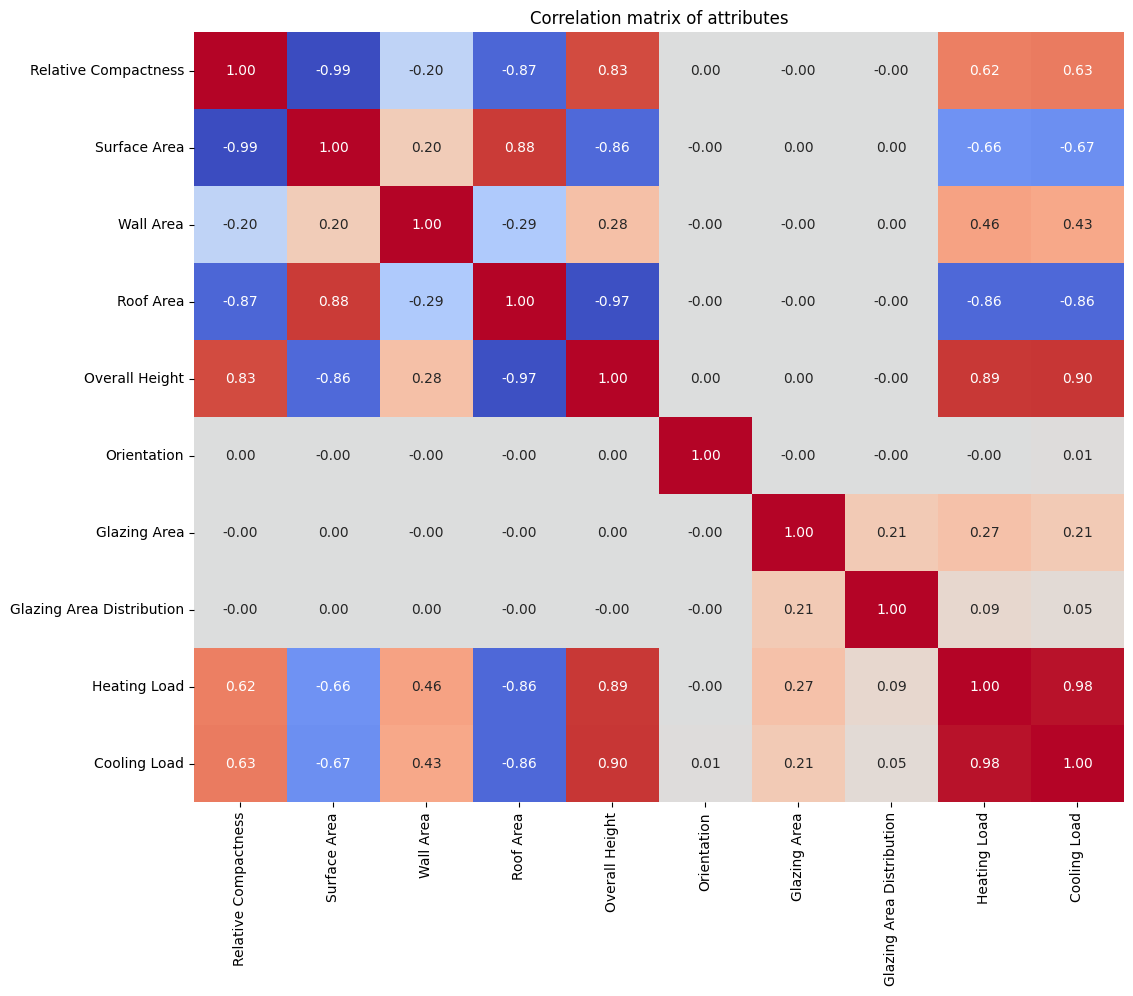

In [10]:
import seaborn as sns
df = pd.concat([X, y], axis=1)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Correlation matrix of attributes")
plt.show()

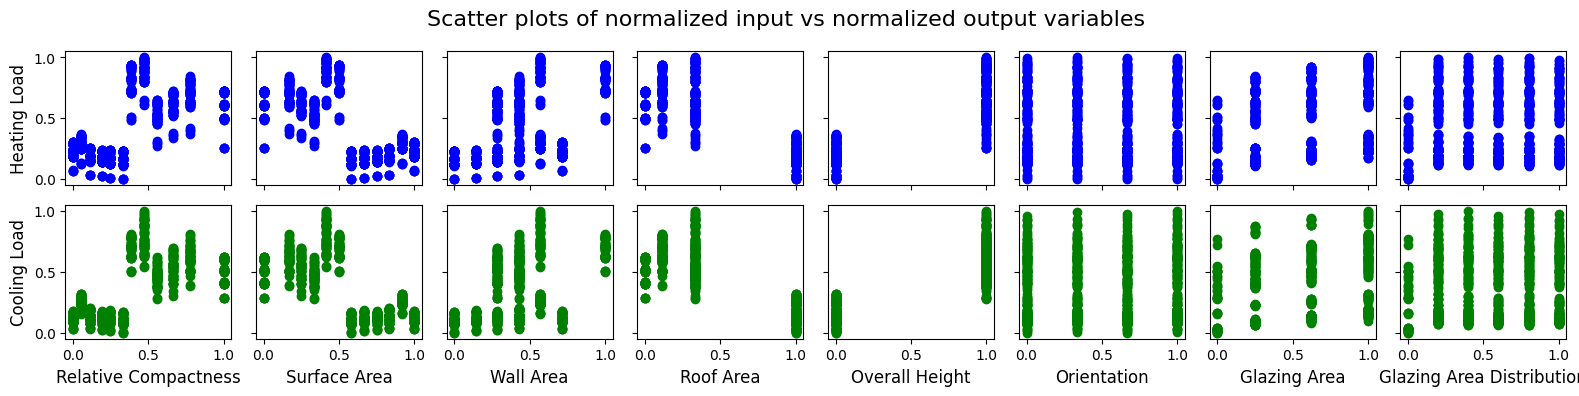

In [37]:
normalized_X = (X - X.min()) / (X.max() - X.min())
normalized_y = (y - y.min()) / (y.max() - y.min())

fig, axs = plt.subplots(2, 8, figsize=(16, 4), sharey=True, sharex=True)

for i, column in enumerate(normalized_X.columns):
    axs[0, i].scatter(normalized_X[column], normalized_y.iloc[:, 0], color='blue')
    if i == 0:
        axs[0, i].set_ylabel("Heating Load", fontsize=12)

    axs[1, i].scatter(normalized_X[column], normalized_y.iloc[:, 1], color='green')
    axs[1, i].set_xlabel(column, fontsize=12)
    if i == 0:
        axs[1, i].set_ylabel("Cooling Load", fontsize=12)

plt.suptitle("Scatter plots of normalized input vs normalized output variables", fontsize=16)
plt.tight_layout()
plt.show()